In [ ]:
#Ex 1 - (a)
point_spacing <- 0.01

time <- 10
x <- c(4,1,3,1,3)
mu <- seq(0,10,point_spacing)

like <- function (data,mu){
    counter <- 1
    if(length(data)> 1) counter <- like(data[2:length(data)],mu)
    return (counter*dpois(data[1],mu))
    }
L <- like(x,mu)    

norm_unif <- sum(dunif(mu,0,20)*L*point_spacing)
norm_jeffrey <- sum((L*point_spacing/sqrt(mu))[2:length(mu)])


plot(mu,dunif(mu,0,20)*L/norm_unif, main = "Posterior",ylab = "p",type="l",col="red",ylim=c(0,0.9))
lines(mu,L/norm_jeffrey/sqrt(mu),col="blue")
lines(mu,dnorm(mu,(1+sum(x))/length(x),(1+sum(x))/(length(x)^2)),col="green")
legend(x="topleft", y="toplet",legend=c("Uniform Prior","Jeffrey Prior","Gaussian"),col=c("red","blue","green"), lty=1, cex=0.8) 

print("For the uniform prior:")
print(c("the numerical mean is ", sum(mu*dunif(mu,0,20)*L*point_spacing/norm_unif)))
print(c("the numerical median is ", which(cumsum(dunif(mu,0,20)*L*point_spacing/norm_unif)>0.5)[1]*point_spacing))
print(c("the numerical variance is ",sum(mu*mu*dunif(mu,0,20)*L*point_spacing/norm_unif) -sum((mu*dunif(mu,0,20)*L*point_spacing/norm_unif))^2)) 
print(c("the analytical mean is ", (1+sum(x))/length(x)))
print(c("the analytical variance is ", (1+sum(x))/(length(x)^2)))
        
print("For the Jeffrey prior:")
print(c("the numerical mean is ", sum((mu*L/norm_jeffrey/sqrt(mu)*point_spacing)[2:length(mu)])))
print(c("the numerical median is ", which(cumsum((L/norm_jeffrey/sqrt(mu)*point_spacing)[2:length(mu)])>0.5)[1]*point_spacing))
print(c("the numerical variance is ",sum((mu*mu*L/norm_jeffrey/sqrt(mu)*point_spacing)[2:length(mu)]) -sum(((mu*L/norm_jeffrey/sqrt(mu)*point_spacing))[2:length(mu)])^2)) 
print(c("the analytical mean is ", (0.5+sum(x))/length(x)))
print(c("the analytical variance is ", (0.5+sum(x))/(length(x)^2)))
 

sigma_try <- seq(point_spacing,10,point_spacing)

for (i in sigma_try) {
    integration_interval <- seq((1+sum(x))/length(x)-i,(1+sum(x))/length(x)+i,point_spacing)
    if (sum(dunif(integration_interval,0,20)*like(x,integration_interval)*point_spacing/norm_unif) > 0.95) {sigma_unif <- i
                                                                                                 break}
    }
for (i in sigma_try) {
    integration_interval <- seq((0.5+sum(x))/length(x)-i,(0.5+sum(x))/length(x)+i,point_spacing)
    if (sum(like(x,integration_interval)/sqrt(integration_interval)*point_spacing/norm_jeffrey) > 0.95) {sigma_jeffrey <- i
                                                                                           break}
    }
print(c("For the uniform prior the interval between " , (1+sum(x))/length(x)-sigma_unif, " and " ,(1+sum(x))/length(x)+sigma_unif , "instead of between " ,(1+sum(x))/length(x)- 2*(1+sum(x))/(length(x)^2)," and ",(1+sum(x))/length(x)+ 2*(1+sum(x))/(length(x)^2) ))
print(c("For the Jeffrey prior the interval between " , (0.5+sum(x))/length(x)-sigma_jeffrey, " and " ,(0.5+sum(x))/length(x)+sigma_jeffrey, "instead of between " ,(0.5+sum(x))/length(x)- 2*(0.5+sum(x))/(length(x)^2)," and ",(0.5+sum(x))/length(x)+ 2*(0.5+sum(x))/(length(x)^2))) 

[1] 401  60


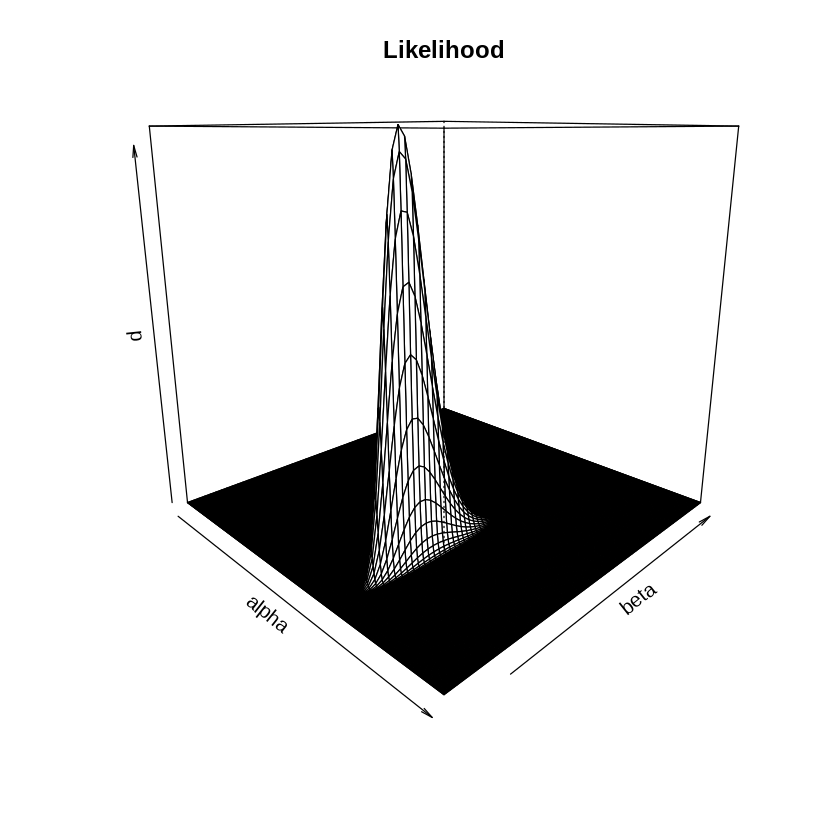

In [171]:
#Ex 2
#Assume uniform pior for alpha and beta
point_distance <- 0.05
alpha_true <- 3
beta_true <- 0.5

alpha <- seq(-10,10,point_distance)
beta <- seq(point_distance,3,point_distance)
x <- rcauchy(30,alpha_true,beta_true)

like <- function (data,alpha,beta){
    counter <- 1
    if(length(data)> 1) counter <- like(data[2:length(data)],alpha,beta)
    return (counter*dcauchy(data[1],alpha,beta))
    }

L <-matrix(0L,nrow=20/point_distance+1,ncol=((3.0-point_distance)/point_distance+1)) 
print(dim(L))
for (i in beta){

    L[,i/point_distance] <- like(x,alpha,i)
    }

norm = 0
for (k in seq(length(beta))){ norm = norm + sum(dunif(alpha,-10,10)*L[,k]*point_spacing)*point_spacing*dunif(beta[k],0,3)}

persp(alpha,beta,L/norm, main = "Likelihood", zlab="p",theta = 45, phi = 15)


In [188]:
#Ex 3
# - Generative model
signal <- function(x, a, b, x0, w, t) {t * (a*exp(-(x-x0)^2/(2*w^2)) + b)}

# Define model parameters
x0  <- 0      # Signal peak
w_vec    <-c(0.1,0.25,1,2,3)       # Signal width
A.true_vec   <- seq(1,5,0.5) # Signal amplitude
B.true   <- 1 # Background amplitude
Delta.t <- 5 # Exposure time

for (A.true in A.true_vec){
for (w in w_vec){
# - Generate the observed data
set.seed(205)
xdat   <- seq(from=-7*w, to=7*w, by=0.7*w)
s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t)
ddat   <- rpois(length(s.true), s.true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)
#plot(xplot, splot,xlab="x", ylab="Signal+Background counts")
#par(new=TRUE)
xdat.off <- xdat-0.25
#plot(xdat.off, ddat, type="s",col="firebrick3",lwd=2,xlim=range(xplot), ylim=range(c(splot, ddat)))

# - Sampling grid for computing posterior
alim   <- c(0.0, 3*A.true)
blim   <- c(0.5, 3*B.true)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

# Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
    }

# Compute log unnormalized posterior ,z = ln Pˆ*(a,b|D), on a regular grid
z <- matrix(data=NA, nrow=length(a), ncol=length(b))
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
        z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
    }
}
z <- z - max(z) # set maximum to zero

# Plot unnormalized 2D posterior as contours.
#contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2,xlab="amplitude , A",ylab="background , B")
#abline(v=2,h=1,col="grey")

# Compute normalized marginalized posteriors , P(a|D) and P(b|D)
# by summing over other parameter. Normalize by gridding.
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/(delta_b*sum(p_b_D))

# Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
# using true values of conditioned parameters. Vectorize(func, par)  
# makes a vectorized function out of func in the parameter par.

p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true,x0, w, Delta.t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b,x0, w, Delta.t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))

par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))

# Plot the 1D marginalized posteriors

#plot(b, p_b_D, xlab="background , B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)  and  P(B | A,D)",type="l", lwd=2)
#lines(b, p_b_aD, lwd=2, lty=2)
#abline(v=B.true, col="grey")
#plot(a, p_a_D, xlab="amplitude , A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",type="l", lwd=2)
#lines(a, p_a_bD, lwd=2, lty=2)
#abline(v=A.true, col="grey")

# Compute mean, standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a    <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) )
sd_b    <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )

# Covariance nurmalization is performed with ’brute force’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops.
cov_ab <- 0
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
        cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
    }
}
cov_ab <- cov_ab / sum(exp(z))
rho_ab <- cov_ab / (sd_a * sd_b)
cat("  a = ", mean_a, "+/-", sd_a, "\n")
cat("  b = ", mean_b, "+/-", sd_b, "\n")
cat("rho = ", rho_ab, "\n")
}
    print("####################################################")
}


#Changing the sampling resolution leaves the results unchanged
#Incresing the ratio changes the error on A more slowly than A itself, leading to a change of 50% of the error
#for an increment o 450% of the value. This leads to a reduction of a factor of 4-5 on the relative error of A


  a =  0.985072 +/- 0.4235089 
  b =  1.07964 +/- 0.1179003 
rho =  -0.424856 
  a =  0.985072 +/- 0.4235089 
  b =  1.07964 +/- 0.1179003 
rho =  -0.424856 
  a =  0.985072 +/- 0.4235089 
  b =  1.07964 +/- 0.1179003 
rho =  -0.424856 
  a =  0.985072 +/- 0.4235089 
  b =  1.07964 +/- 0.1179003 
rho =  -0.424856 
  a =  0.985072 +/- 0.4235089 
  b =  1.07964 +/- 0.1179003 
rho =  -0.424856 
[1] "####################################################"
  a =  1.675169 +/- 0.476066 
  b =  1.066733 +/- 0.1184435 
rho =  -0.4024422 
  a =  1.675169 +/- 0.476066 
  b =  1.066733 +/- 0.1184435 
rho =  -0.4024422 
  a =  1.675169 +/- 0.476066 
  b =  1.066733 +/- 0.1184435 
rho =  -0.4024422 
  a =  1.675169 +/- 0.476066 
  b =  1.066733 +/- 0.1184435 
rho =  -0.4024422 
  a =  1.675169 +/- 0.476066 
  b =  1.066733 +/- 0.1184435 
rho =  -0.4024422 
[1] "####################################################"
  a =  2.122104 +/- 0.5038351 
  b =  1.066713 +/- 0.1187182 
rho =  -0.3857882 
  a = 